# Welcome to the Challenge notebook
---

Importing modules

In [1]:
import pandas as pd 
import string 

# Importing Natural Language Processing toolkit 
import nltk

# Downloading the NLTK english stop words
nltk.download('stopwords')

# Importing data visualization modules 
from wordcloud import WordCloud

print("Modules are imported! :)")

Modules are imported! :)


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Challenge description:

In this challenge, we are tasked with analyzing reviews related to various products from an online shop. The dataset provided contains 15,000 review texts along with the corresponding sentiment for each review. Our goal is to assist the advertisement team of the company in creating a word cloud visualization specifically focusing on the adjectives used in reviews with positive sentiments.

In [2]:
# loading the dataset
data = pd.read_csv("reviews.csv")

# reviews to lower case
data.Review = data.Review.str.lower()

# removing the punctuation
data.Review = data.Review.str.translate(str.maketrans('', '', string.punctuation))

# tokenization
data['tokens'] = data.Review.apply(nltk.word_tokenize)

data.head()

,Sentiment,Review,tokens
0,Positive,this is the wonderfully engaging tale of how b...,"[this, is, the, wonderfully, engaging, tale, o..."
1,Positive,charles manson is part of the american conscie...,"[charles, manson, is, part, of, the, american,..."
2,Positive,helter skelter motive is a little far out real...,"[helter, skelter, motive, is, a, little, far, ..."
3,Negative,what permissive issues could ban all photosa c...,"[what, permissive, issues, could, ban, all, ph..."
4,Positive,i was 16 years old the summer of 1969 and reme...,"[i, was, 16, years, old, the, summer, of, 1969..."


Filter only the reviews with `Positive` sentiment

In [5]:
# write your code here
data = data[data['Sentiment'] == 'Positive']
data.head()

,Sentiment,Review,tokens
0,Positive,this is the wonderfully engaging tale of how b...,"[this, is, the, wonderfully, engaging, tale, o..."
1,Positive,charles manson is part of the american conscie...,"[charles, manson, is, part, of, the, american,..."
2,Positive,helter skelter motive is a little far out real...,"[helter, skelter, motive, is, a, little, far, ..."
4,Positive,i was 16 years old the summer of 1969 and reme...,"[i, was, 16, years, old, the, summer, of, 1969..."
5,Positive,i had no idea the manson family was so much mo...,"[i, had, no, idea, the, manson, family, was, s..."


use `nltk.pos_tag` method to find the role of the tokens in the sentences

In [6]:
# write your code here
data['POS_tokens'] = data.tokens.apply(nltk.pos_tag)
data.head()

,Sentiment,Review,tokens,POS_tokens
0,Positive,this is the wonderfully engaging tale of how b...,"[this, is, the, wonderfully, engaging, tale, o...","[(this, DT), (is, VBZ), (the, DT), (wonderfull..."
1,Positive,charles manson is part of the american conscie...,"[charles, manson, is, part, of, the, american,...","[(charles, NNS), (manson, NN), (is, VBZ), (par..."
2,Positive,helter skelter motive is a little far out real...,"[helter, skelter, motive, is, a, little, far, ...","[(helter, NN), (skelter, NN), (motive, NN), (i..."
4,Positive,i was 16 years old the summer of 1969 and reme...,"[i, was, 16, years, old, the, summer, of, 1969...","[(i, NN), (was, VBD), (16, CD), (years, NNS), ..."
5,Positive,i had no idea the manson family was so much mo...,"[i, had, no, idea, the, manson, family, was, s...","[(i, NN), (had, VBD), (no, DT), (idea, NN), (t..."


Extract all the adjectives from the reviews with positive sentiment

In [8]:
# write your code here
data['adjectives'] = data.POS_tokens.apply(lambda x: [token for token, tag in x if tag == 'JJ'])

Use a word cloud to visualize all the adjectives used in the positive reviews

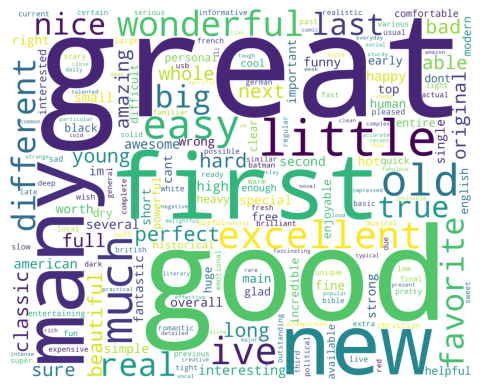

In [12]:
# write your code here
import matplotlib.pyplot as plt

adjectives_in_string = ""
for x in data.adjectives:
    adjectives_in_string += " ".join(x) + " "

word_cloud = WordCloud(collocations = False,
                      scale = 3, 
                      width = 1000, 
                      height =800,
                      background_color = 'white').generate(adjectives_in_string)

plt.imshow(word_cloud)
plt.axis('off')
plt.show()